In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("height-weight.csv")
print(df)

    Weight  Height
0       45     120
1       58     135
2       48     123
3       60     145
4       70     160
5       78     162
6       80     163
7       90     175
8       95     182
9       78     170
10      82     176
11      95     182
12     105     175
13     100     183
14      85     170
15      78     177
16      50     140
17      65     159
18      76     150
19      87     167
20      45     129
21      56     140
22      72     160


In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


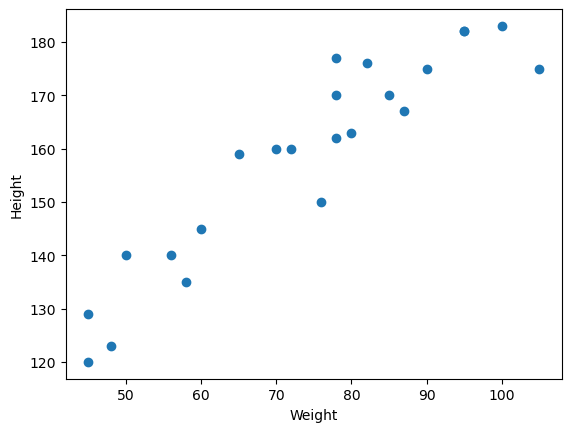

In [4]:
###Scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')    
plt.show()

In [5]:
###If you want to find out whather the relation is positive or negative you can use correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


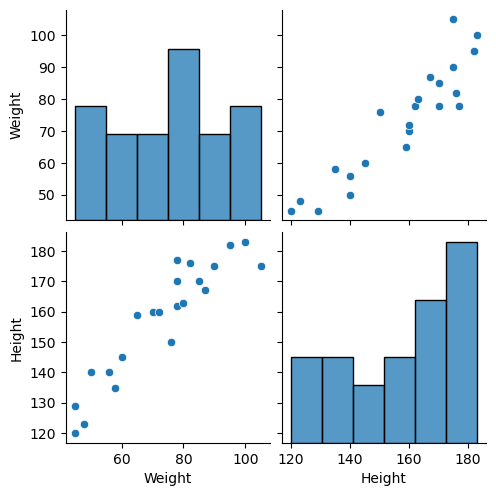

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
## Independent and dependent features  
x=df[['Weight']]### independent features strictly  should be in 2 dimensional array

y=df['Height']### dependent features can be in series or 1 dimensional array

x.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [8]:
x_series=df['Height']### in series dependent features can be in 1 dimensional array
np.array(x_series).shape



(23,)

In [9]:
np.array(y).shape

(23,)

In [10]:
###TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
###Standardization
from sklearn.preprocessing import StandardScaler


In [13]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)

In [14]:
x_test=scalar.transform(x_test)

In [15]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [16]:
###apply machine learning algorithm i.e is simple linear regression 
from sklearn.linear_model import LinearRegression


In [17]:
regression=LinearRegression(n_jobs=-1)

In [18]:
regression.fit(x_train,y_train )

LinearRegression(n_jobs=-1)

In [19]:
print("coefficent or slope:", regression.coef_)
print("intercept:", regression.intercept_)

coefficent or slope: [17.2982057]
intercept: 156.47058823529412


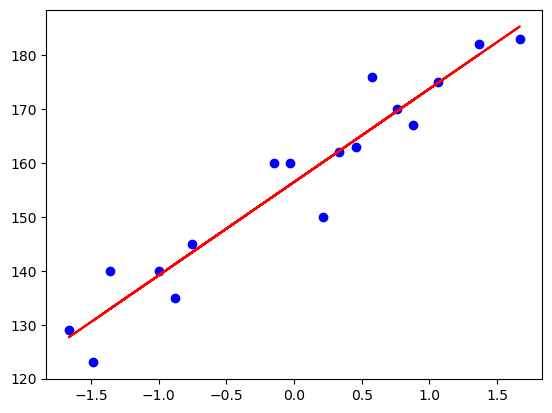

In [20]:
##plot training data plot best fit line
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,regression.predict(x_train),color='red')
plt.show()

### prediction of test data
1.predicted height output=intercept+coef_(weights)
2.y_pred_test=156.470+17.29(x_test)

In [21]:
##predict on test data
y_pred=regression.predict(x_test)
print(y_pred)

[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [22]:
### Performance metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [23]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse) 

Mean Squared Error: 114.84069295228699
Mean Absolute Error: 9.665125886795005
Root Mean Squared Error: 10.716374991212605


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [24]:
from sklearn.metrics import r2_score

In [25]:
score=r2_score(y_test,y_pred)
print("R2 score:", score)

R2 score: 0.7360826717981276


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [26]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x.shape[1]-1)

0.6701033397476595

In [27]:
## OLS Linear regression using statsmodels
import statsmodels.api as sm

In [28]:
model=sm.OLS(y_train,x_train).fit()

In [29]:
prediction=model.predict(x_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [30]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 15 Jan 2026   Prob (F-statistic):                       0.664
Time:                        14:44:47   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\anacondda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [31]:
## prediction for new data
regression.predict(scalar.transform([[60]]))

d:\anacondda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([143.40234673])